# CMR - Secondary Baseline
Using the larger dataset from

> Murdock, B. B., & Okada, R. (1970). Interresponse times in single-trial free recall. Journal of Experimental Psychology, 86(2), 263.

## Load Data

In [1]:
from instance_cmr.datasets import prepare_okadata
from instance_cmr.model_fitting import cmr_murd_likelihood
from instance_cmr.model_fitting import cmr_murd_objective_function
from instance_cmr.model_fitting import visualize_fit
from instance_cmr.models import CMR

murd_trials0, murd_events0, murd_length0 = prepare_okadata(
    '../../data/mo1970.txt')

subject_trial_count = 20 # Each subject gets 20 trials a piece.

murd_events0.head()

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,NaN,True,False,0,False
1,1,1,2,2,NaN,True,False,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Fitting

In [2]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

In [ ]:
# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = cmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0])}, free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 22975.74580427349
     jac: array([-1.83754309, -1.36897143, -1.42717908,  1.83426892,  0.12951205,
        0.55624696, -0.42091415,  0.        , 48.06242941, 15.93834896,
        0.42600732])
 message: 'Optimization terminated successfully.'
    nfev: 7167
     nit: 34
 success: True
       x: array([ 0.67729029,  0.0789752 ,  0.84475351,  0.32843236,  0.04606376,
        0.25014697,  4.09477771, 35.20917629,  0.03838687,  0.29442883,
        5.03376164])
```

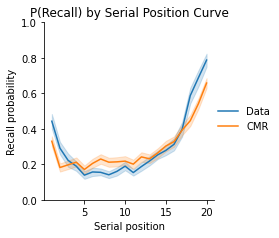

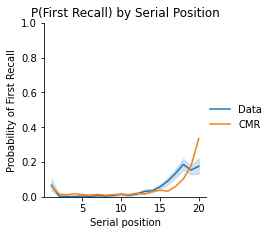

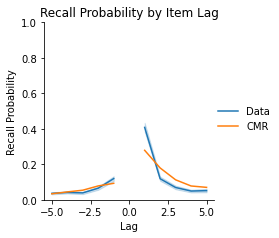

In [4]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0
}

visualize_fit(CMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

## Subjectwise

In [ ]:
results = []

for subject, start_index in enumerate(range(0, len(murd_trials0), subject_trial_count)):
    print(subject)

    # cost function to be minimized
    # ours scales inversely with the probability that the data could have been 
    # generated using the specified parameters and our model
    cost_function = cmr_murd_objective_function(
        List([murd_trials0[start_index:start_index+subject_trial_count]]), 
        {'item_counts': List([murd_length0])}, free_parameters)

    results.append(differential_evolution(cost_function, bounds, disp=False))

In [4]:
print([result.fun for result in results])

[297.5449602629021, 244.27865681106456, 336.1941467631634, 337.9736726645333, 347.27423245825815, 304.3522491574062, 262.50299102240217, 289.2997997209494, 232.9697672095716, 358.64382009414555, 184.7663450341519, 318.8257481934555, 380.03713872967427, 270.00865939808784, 290.09247000202845, 336.82113634424866, 312.20520949311054, 290.7102563710308, 395.46388701889566, 395.04781617279355, 310.8428462711054, 338.3685597049247, 388.3115788958439, 297.72437675541596, 273.1019380621366, 371.9867789818122, 327.6887122330527, 291.946344874964, 348.4191026098891, 302.3530027028615, 347.5938865051015, 309.8776333858249, 336.80662658082076, 386.73848147630076, 314.8512212055618, 387.3090042203206, 299.0963052579905, 297.7244112968297, 237.85429982056422, 233.3334842451797, 212.9926852817866, 270.81256558818916, 299.9471356314759, 252.01763332568177, 297.20772602556264, 303.1243577018423, 203.49661125114864, 250.53915718548024, 223.46817443689832, 250.54360923163125, 156.85155116172984, 262.8736